In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional

params = {'legend.fontsize': 15,
          'legend.handlelength': 2,
          "axes.labelsize": 15,
          "xtick.labelsize": 15,
          "ytick.labelsize": 15,
          "lines.linewidth": 1.5,
           "axes.titlesize":15,
         'font.size': 22}
matplotlib.rcParams.update(params)

**Functions for visualisation**

In [2]:
def make_graph_metric(file, show:bool=True):
    with open(file, 'rb') as f:
        loss, metrics = pickle.load(f)
    
    ep = len(loss[0])
    num_exp = len(loss)
    metric = {'ndcg@5':[],
              'ndcg@10':[],
              'ndcg full':[]}
    
    for i in range(num_exp):
        for key in metric.keys():
            metric[key].append(metrics[i][key])        
            
    means, stds = {}, {}
    for key in metric.keys():
        y = np.array(metric[key])
        means[key] = y.mean(0)
        stds[key] = (y.std(0))
        metric[key] = y
        
    if show:
        fig, axes = plt.subplots(1,len(metric.keys()), figsize = (15,5))
    
        for i, key in enumerate(metric.keys()):
            axes[i].plot(range(ep), means[key])
            axes[i].fill_between(range(ep), means[key] - stds[key], means[key] + stds[key], alpha = 0.2)
            axes[i].grid(True)
            
            
        plt.tight_layout()
        plt.show()
        
    return means ,stds
        

In [3]:
def make_graph_loss(file, show=True):
    with open(file, 'rb') as f:
        losses, metrics = pickle.load(f)
                            
    means, stds = {}, {}
    loss = losses[0]
    
    for key in range(1,5):
        loss = np.vstack((loss, losses[key]))
        
    means = loss.mean(0)
    stds = loss.std(0)
    
    if show:
        plt.plot(range(len(means)),means)
        plt.fill_between(range(len(loss[0])),means - stds, means + stds, alpha = 0.2)
        plt.tight_layout()
        plt.grid()
        plt.show()
    return means, stds
     

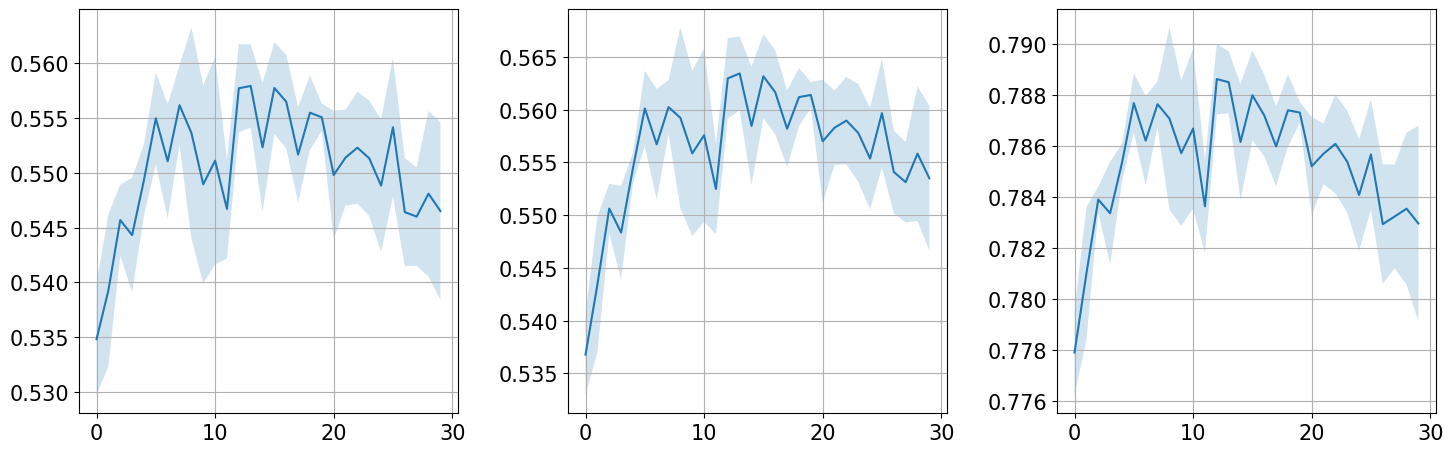

In [4]:
means1, stds1 = make_graph_metric(file =r'/home/aletovv/Learning-To-Rank/Transformer/done experiments data/deg = 4 listnet', show=True )

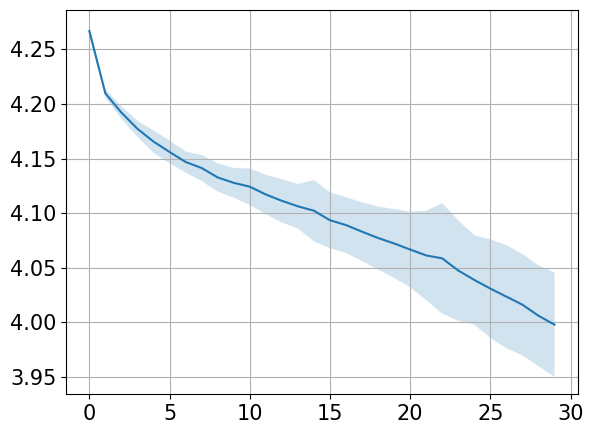

(array([4.26686282, 4.2096594 , 4.19207494, 4.17721474, 4.16551967,
        4.15601447, 4.14684795, 4.14130936, 4.13264514, 4.12770573,
        4.12419094, 4.11702265, 4.11122566, 4.10619343, 4.10212706,
        4.09342875, 4.08899522, 4.08292315, 4.07711808, 4.07213706,
        4.06657064, 4.06114881, 4.05846034, 4.04731225, 4.03868205,
        4.03076831, 4.02335567, 4.01600973, 4.00586809, 3.99771116]),
 array([0.00326473, 0.00410006, 0.00564576, 0.0073639 , 0.010278  ,
        0.01046001, 0.00969462, 0.01196573, 0.01294946, 0.01357306,
        0.01668553, 0.01802091, 0.01985758, 0.02036753, 0.02811461,
        0.025656  , 0.0254968 , 0.02700339, 0.02886555, 0.03152753,
        0.03465762, 0.04092307, 0.05062755, 0.04602636, 0.04103191,
        0.04512082, 0.04729076, 0.04648058, 0.04621612, 0.0478342 ]))

In [5]:
make_graph_loss(file = r'/home/aletovv/Learning-To-Rank/Transformer/done experiments data/deg = 4 listnet')

In [6]:
def make_graph_comparison(means:list[dict[str, list[np.ndarray]]],stds:list[dict[str, list[np.ndarray]]], 
      key_metric:str='ndcg@5',imp_idx=0, labels:Optional[list[str]]=None, colors:list[str]=['green'], save:bool=False, **kwargs ) -> None:

    key = key_metric
    plt.figure(figsize = (5,5))
    
    for idx, mean_std in enumerate(zip(means, stds)):
        
        label = labels[idx] if labels else None
        alpha = 0.4 if idx==imp_idx else 0.2
        linewidth = 2.5 if idx==imp_idx else 1.5
        
        mean, std = mean_std
        
        plt.plot(range(len(mean[key])),mean[key], label=label, color=colors[idx], linewidth=linewidth )
        plt.fill_between(range(len(mean[key])), mean[key] - std[key], mean[key] + std[key], alpha=alpha, color=colors[idx])

    if labels:
        plt.legend()
    
    plt.grid()
    plt.ylabel(f'${key.upper()}$') if len(key.split()) <= 1 else plt.ylabel(r'$NDCG$')
    plt.xlabel('Number of epoch')
    plt.title(f'${key.upper()}$') if len(key.split()) <= 1 else plt.title(r'$NDCG$')
    if save:
        name = kwargs.get('name', 'example_pic.pdf')
        plt.savefig(name, bbox_inches='tight', format = 'pdf')

In [7]:
exps = [r'/home/aletovv/Learning-To-Rank/Transformer/done experiments data/deg = 1 listnet', 
        r'/home/aletovv/Learning-To-Rank/Transformer/done experiments data/deg = 2 listnet', 
        r'/home/aletovv/Learning-To-Rank/Transformer/done experiments data/deg = 3 listnet']


In [8]:
means, stds = [], []

for file in exps:
    mean, std = make_graph_metric(file, show = False)
    means.append(mean)
    stds.append(std)

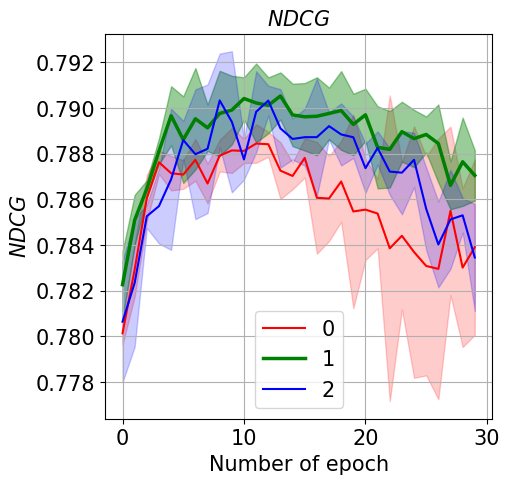

In [9]:
colors = ['red', 'green', 'blue']
imp_idx = 1
labels = ['0','1','2']

make_graph_comparison(means, stds, key_metric='ndcg full',labels = labels, imp_idx=imp_idx,colors = colors )